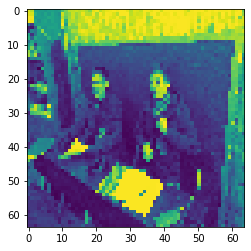

In [0]:
from numpy import *
# Load the mandrill image
from PIL import Image
mandrill = Image.open('/content/IMG_20181029_133819696_BURST001 (1).jpg')
mandrill=mandrill.convert('L')
mandrill = mandrill.resize((64,64))
mandrill = asarray( mandrill )

# Show mandrill
from matplotlib.pyplot import *
figure(1)
imshow(mandrill)

In [0]:
!pip install dtcwt
import dtcwt

     |████████████████████████████████| 71kB 3.1MB/s 
  Created wheel for dtcwt: filename=dtcwt-0.12.0-cp36-none-any.whl size=87884 sha256=7354dfbd189c3684229fcc9d5aff06551783c4cf247ac69f7b7c8c010031ba40
  Stored in directory: /root/.cache/pip/wheels/af/50/10/5db3067e8d9829dc244808b67d0c0c6b9226756c923e785450
Successfully built dtcwt


In [0]:
transform = dtcwt.Transform2d()

def layer(scattering_vector,image,m):
  n=len(image)
  J=int(log(n/4)/log(2))
  image_t=transform.forward(image, nlevels=J+1)
  if n>4 and m<M:
    for j in range(J):
      for theta in range(image_t.highpasses[j].shape[2]):
        scattering_vector=layer(scattering_vector,abs(image_t.highpasses[j][:,:,theta]),m+1)
    return([image_t.lowpass]+scattering_vector)
  else:
    return([image_t.lowpass]+scattering_vector)


M=2
scattering_vector=layer([],mandrill,0)
print(len(scattering_vector))

#1+6*4+6*36=241


241


In [0]:
scattering_vector=log(scattering_vector)

array([[[7.71170964, 7.87787863, 7.93325344, 7.95797545],
        [7.19744994, 7.00851576, 7.0510981 , 7.36111088],
        [6.86016082, 6.71519288, 6.74699495, 7.00416054],
        [6.45994529, 7.27744465, 7.33572043, 6.88350913]],

       [[5.24522651, 5.71250616, 5.86874423, 5.71028357],
        [4.86312959, 5.32123956, 5.44024946, 5.1414322 ],
        [5.07013962, 5.63816918, 5.56647555, 4.68172252],
        [5.42204677, 6.23152356, 6.08073371, 4.78170711]],

       [[3.65094551, 4.21173409, 4.42024755, 4.34424588],
        [4.46947757, 4.61335058, 4.46310116, 3.89514132],
        [5.18141839, 5.15830889, 4.84465542, 3.9374871 ],
        [5.45307602, 5.69929336, 5.54397329, 4.57496207]],

       ...,

       [[3.11581206, 2.65614826, 2.30814278, 2.27262331],
        [3.30790953, 3.16545602, 2.91780351, 2.55228793],
        [3.29701834, 3.35638565, 3.21342164, 2.81232583],
        [2.95398096, 3.36452114, 3.3889572 , 3.03447512]],

       [[2.569525  , 2.10448877, 1.93161745, 2.1939

In [0]:
feature_vector=[]
for S in scattering_vector:
  for i in S:
    for j in i:
      feature_vector=feature_vector+[j]

feature_vector=np.array(feature_vector)
n=len(feature_vector)

array([7.71170964, 7.87787863, 7.93325344, ..., 3.52194395, 3.53756582,
       3.05745839])

In [0]:
from keras import *

model_w = Sequential()
model_w.add(layers.Dense(10, activation='linear', input_dim=n))
print(model_w.summary())

model_w.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                38570     
Total params: 38,570
Trainable params: 38,570
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model_w.predict(feature_vector)

ValueError: ignored